### You are required to code as per the given section and answers the questions inline with the relevant implementation.

# 1. Import the required libraries

In [193]:
##---------Type the code below this line------------------##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

from wordcloud import WordCloud

# 2. Data Acquisition  
 


## 2.1 Code for using the given COVID Tweets dataset
Dataset Structure:
- UserName
- ScreenName
- Location
- Tweet At
- Original Tweet
- Sentiment (Target Variable): Negative - 0, Positive - 1, Neutral - 2

Create a dataframe named as `covid_tweets` then check the head, info, and describe methods on created dataframe covid_tweets.


In [183]:
##---------Type the code below this line------------------##

#Load the data
covid_tweets = pd.read_csv('Coronavirus Tweets.csv', encoding = "latin1")

#Check the first few rows of the data
print(covid_tweets.head())

#Check the info on each column of the data
print(covid_tweets.info())

#Check the summary stat for each column of the data frame
print(covid_tweets.describe())

#Print the nyumber of tweets for each sentiment
print(covid_tweets['Sentiment'].value_counts())

   UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet  Sentiment  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...          2  
1  advice Talk to your neighbours family to excha...          1  
2  Coronavirus Australia: Woolworths to give elde...          1  
3  My food stock is not the only one which is emp...          1  
4  Me, ready to go at supermarket during the #COV...          0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       325

There are 41,157 tweets in teh data set with 15,398 tweets are labelled as *Negative*, 18,046 tweets are labelled as *Positive* and 7.713 tweets are labelled as *Neutral*. The sentiment classifications are slightly unbalanced.

# 3. Data Preparation 

Perform the data prepracessing that is required for the given data.  

## 3.1 Apply pre-processing techiniques

* Removing Punctuations 
* Numbers
* Special Characters
* Stop Words


In [184]:
##---------Type the code below this line------------------##

# Get the original tweets and convert them to lower case
tweets = covid_tweets['OriginalTweet'].str.lower()

# Remove the punctuations and special characters from the tweets
tweets = tweets.str.replace('[^\w\s]', '', regex=True)

#Replace _ with a space to separate the words
tweets = tweets.str.replace('[_]', ' ', regex=True)

# Remove numbers from the tweets
tweets = tweets.str.replace('[0-9]', '', regex=True)

# Remove the stopwords
stopw = stopwords.words('english') #English stop words from NLTK

# Remove the words "covid" and "coronavirus" as they are the keywords 
#used to retrieve the tweets
stopw.append('covid')
stopw.append('coronavirus')

tweets = tweets.apply(lambda x: ' '.join([word for word in x.split() if word not in stopw]))

#Check the tweets now
tweets.head()

0    menyrbie phil gahan chrisitv httpstcoifzfanpa ...
1    advice talk neighbours family exchange phone n...
2    australia woolworths give elderly disabled ded...
3    food stock one empty please dont panic enough ...
4    ready go supermarket outbreak im paranoid food...
Name: OriginalTweet, dtype: object

While removing stop words, we have removed the words **covid** and **coronavirus** as well, because it is expected that these two words will appear in almost all tweets related to covid and hence uninformative to understand their sentiment.

# 4. Normalize tweets by using Stemming / Lemmatization.

In [185]:
##---------Type the code below this line------------------##

# Define a function for lemmatization of string 

def my_lemma(tweet):
    text = tweet.split()
    lemma_text = []
    wordnet_lemmatizer = WordNetLemmatizer()
    for w in text:
        word1 = wordnet_lemmatizer.lemmatize(w, pos = "n")
        word2 = wordnet_lemmatizer.lemmatize(word1, pos = "v")
        word3 = wordnet_lemmatizer.lemmatize(word2, pos = ("a"))
        lemma_text.append(word3)
        
    # Combine all of them into a single string
    text = ' '.join(lemma_text)
    return text

#Apply the function to all tweets
tweets = tweets.apply(lambda tweet: my_lemma(tweet))

# Include the cleaned tweets in the data farme
covid_tweets['cleaned_tweets'] = tweets

#Check the dataframe now
covid_tweets.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,cleaned_tweets
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,2,menyrbie phil gahan chrisitv httpstcoifzfanpa ...
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,1,advice talk neighbour family exchange phone nu...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,1,australia woolworth give elderly disable dedic...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,1,food stock one empty please dont panic enough ...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",0,ready go supermarket outbreak im paranoid food...


# 5. Plot word cloud for the tweets.

Preprocessed tweets should be included in the covid_tweets data frame as `cleaned_tweets`. 

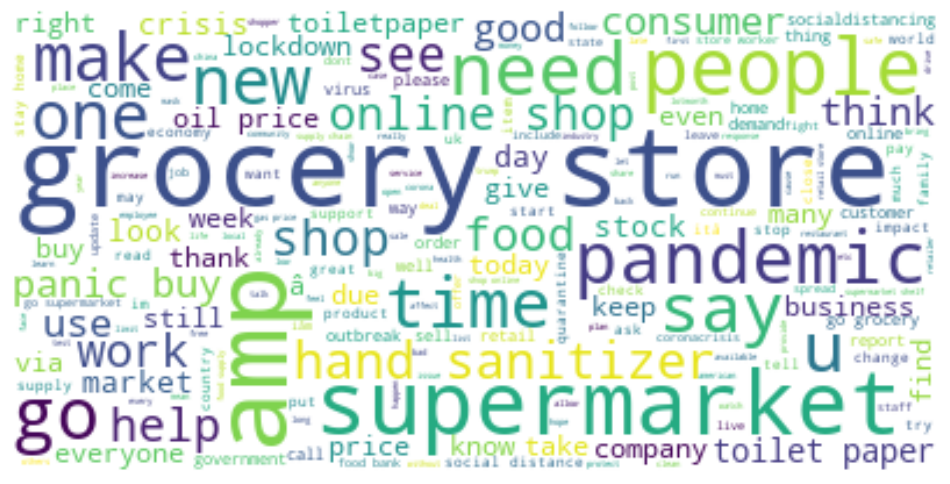

In [186]:
##---------Type the code below this line------------------##

#Join all tweets into one string for wordcloud
all_tweets =' '.join(tweet for tweet in covid_tweets['cleaned_tweets'])
all_tweets = all_tweets.strip()

# Generate the wordcloud - avoid collocations
wc = WordCloud(background_color="white").generate(all_tweets)

#Plot the wordcloud
plt.figure( figsize=(12,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

The wordcloud shows that the most used words in the tweets are *grocery store*, *supermarket* and *pandemic*. There are other high frequency phrases like *online shop*, *hand sanitizer*, *people*, *food*, *panic buy* etc. These shows a glimpse of the issues people were more concerned about during the covid. During lockdown, the grocery store and supermarket became a huge concern for people as many of them ran out of supplies.

# 6. Perform N-gram Analysis on `cleaned_tweets`

- Visualize the 20 - most frequently occurring Bigrams and Trigrams


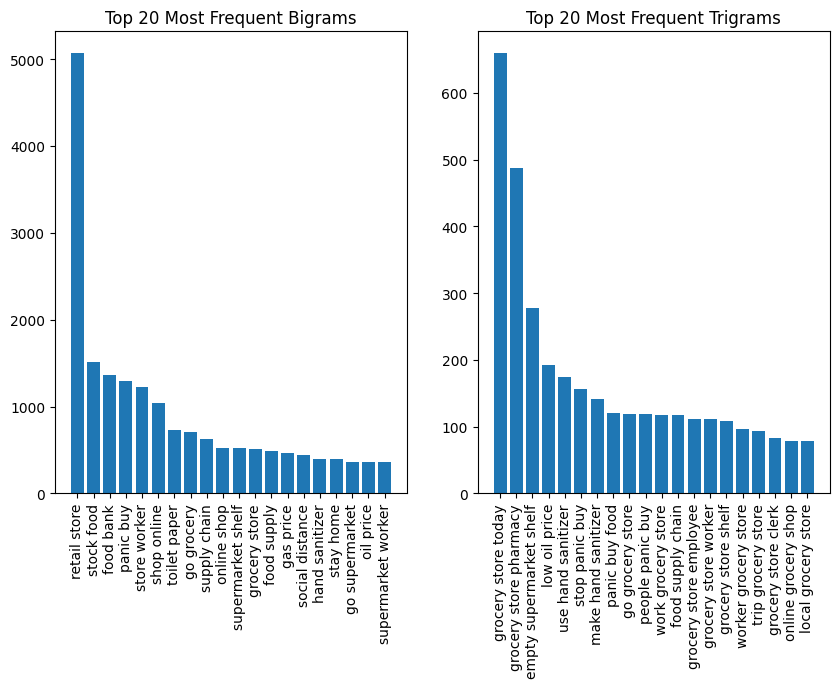

In [188]:
##---------Type the code below this line------------------##
#Get the Top 20 bigrams
#Extract the bigrams
vec = CountVectorizer(ngram_range=(2,2), max_features=20).fit(covid_tweets['cleaned_tweets'])

#Create a bag of words with bigrams
bag_of_words = vec.transform(covid_tweets['cleaned_tweets'])

# Compute the frequencies of the bigrams
sum_words = np.asarray(bag_of_words.sum(axis=0)).flatten()
word_freq=dict(zip(vec.vocabulary_.keys(), sum_words))
word_freq=dict(sorted(word_freq.items(), key = lambda x: x[1], reverse=True))

#Plot the bigrams
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.bar(word_freq.keys(), word_freq.values())
plt.xticks(rotation=90)
plt.title('Top 20 Most Frequent Bigrams')

#Get the Top 20 Trigrams
#Extract the trigrams
vec = CountVectorizer(ngram_range=(3,3), max_features=20).fit(covid_tweets['cleaned_tweets'])

#Create a bag of words with bigrams
bag_of_words = vec.transform(covid_tweets['cleaned_tweets'])

# Compute the frequencies of the bigrams
sum_words = np.asarray(bag_of_words.sum(axis=0)).flatten()
word_freq=dict(zip(vec.vocabulary_.keys(), sum_words))
word_freq=dict(sorted(word_freq.items(), key = lambda x: x[1], reverse=True))

#Plot the bigrams
plt.subplot(1,2,2)
plt.bar(word_freq.keys(), word_freq.values())
plt.xticks(rotation=90)
plt.title('Top 20 Most Frequent Trigrams')
plt.show()

The most frequent bigram is *retail store* followed by *stock food*, while the most frequent trigrams are *grocery store today* and *grocery store pharmacy*. Both bigrams and trigrams are showing that people were mostly concerned with grocery and food.

## 7. Model Training

## 7.1 Create a BoW object and split the data into training and testing sets. Train a Decision tree model and Display the confusion Matrix.

In [189]:
##---------Type the code below this line------------------##

#Create a bag of words with maximum 1000 most frequent bigrams and trigrams
vec = CountVectorizer(max_features=1000).fit(covid_tweets['cleaned_tweets'])

#Create a bag of words with bigrams
bag_of_words = vec.transform(covid_tweets['cleaned_tweets'])

y = covid_tweets['Sentiment']

#Split the data into training and test sets with a 70%-30% split
X_train, X_test, y_train, y_test = train_test_split(bag_of_words, y, test_size=0.3, random_state=42)

print('Size of the training set:', X_train.shape[0])
print('Size of the test set:', X_test.shape[0])

Size of the training set: 28809
Size of the test set: 12348


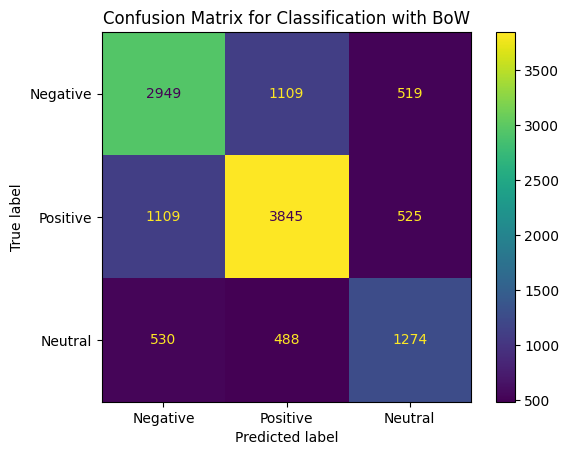

In [190]:
#Fit a decision tree model
clf_bow = DecisionTreeClassifier(random_state=42)
clf_bow.fit(X_train, y_train)

#Predict from the decision tree model
y_pred = clf_bow.predict(X_test)

#Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf_bow.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Negative', 'Positive', 'Neutral'])
disp.plot()
plt.title('Confusion Matrix for Classification with BoW')
plt.show()

We have created a bag of words with most frequent 1000 words and then split the data into training and the test sets with training set having 28, 809 observations and the test set having  12, 348 observations. Then we fit a `DecisionTreeClassifier` with default parameter settings and `random state=42`, so that we can replicate the results.

After training the model, the confusion matric based on the test set shows that the accuracy of the model is not very good. The *positive* tweets are correctly classified more than the *negative* and *neutral* tweers. We discuss in more detail later.

## 7.2 Create a Tfidf object and split the data into training and testing sets. Train a decision tree model and Display the confusion Matrix.

In [191]:
##---------Type the answer below this line------------------##

#Create a Tf-Idf object with maximum 1000 features
vectorizer = TfidfVectorizer(max_features=1000)
X_tf_idf = vectorizer.fit_transform(covid_tweets['cleaned_tweets'])

#Split the data into training and test sets with a 70%-30% split
X_train, X_test, y_train, y_test = train_test_split(X_tf_idf, y, test_size=0.3, random_state=42)

print('Size of the training set:', X_train.shape[0])
print('Size of the test set:', X_test.shape[0])

Size of the training set: 28809
Size of the test set: 12348


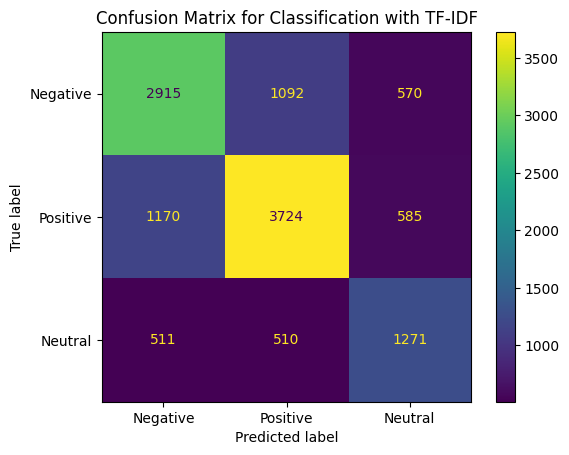

In [192]:
#Fit a decision tree model
clf_tfidf = DecisionTreeClassifier(random_state=42)
clf_tfidf.fit(X_train, y_train)

#Predict from the decision tree model
y_pred2 = clf_tfidf.predict(X_test)

#Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred2, labels=clf_tfidf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Negative', 'Positive', 'Neutral'])
disp.plot()
plt.title('Confusion Matrix for Classification with TF-IDF')
plt.show()

We have created a TF-IDF object with most frequent 1000 words and then split the data into training and the test sets with training set having 28, 809 observations and the test set having 12, 348 observations. Then we fit a` DecisionTreeClassifier` with default parameter settings and `random_state=42`, so that we can replicate the results.

After training the model, the confusion matric based on the test set shows that the accuracy of the model is not very good. The positive tweets are correctly classified more than the negative and neutral tweers. We discuss in more detail later.

## 7.3 Compare Tfidf and BoW with detailed analysis

In [194]:
##---------Type the code below this line------------------##
#Detailed Classification Report for BoW model

print('BoW Model:')
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive', 'Neutral']))

print('\n==================================')
print('TF-IDF Model:')
print(classification_report(y_test, y_pred2, target_names=['Negative', 'Positive', 'Neutral']))

BoW Model:
              precision    recall  f1-score   support

    Negative       0.64      0.64      0.64      4577
    Positive       0.71      0.70      0.70      5479
     Neutral       0.55      0.56      0.55      2292

    accuracy                           0.65     12348
   macro avg       0.63      0.63      0.63     12348
weighted avg       0.65      0.65      0.65     12348


TF-IDF Model:
              precision    recall  f1-score   support

    Negative       0.63      0.64      0.64      4577
    Positive       0.70      0.68      0.69      5479
     Neutral       0.52      0.55      0.54      2292

    accuracy                           0.64     12348
   macro avg       0.62      0.62      0.62     12348
weighted avg       0.64      0.64      0.64     12348



# 8. Display the HMM POS tagging on the first 4 rows of `cleaned_tweets`.


In [ ]:
##---------Type the code below this line------------------##